## DS 3000 Project Part 1
### Quillian Alewine, Liam Bouayad-Agha, Owen Marcotte, Matt Yakir

Our DS 3000 Project Group is analyzing credit card fraud data in hopes of answering two main questions:
1. What specific factor is the most influential on determining credit card fraud
2. How accurately can we  predict credit card fraud actions given our data fields

In summary of our process, we have initially received the data using an API command, allowing us to download the data csv files where we have read them into pandas dataframes for more accessibility. To clean the data, gender fields have been one-end coded, bank names have been cleaned, and unnecessary fields pertaining to our project questions have been removed. Our current data is stored in data frame format and has been used to create to visualizations discussed below.


In [1]:
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kartik2112/fraud-detection -p ../csv/
!unzip ../csv/fraud-detection.zip -d ../csv/

mkdir: /Users/owemarco/.kaggle: File exists
mv: rename kaggle.json to /Users/owemarco/.kaggle/kaggle.json: No such file or directory
chmod: /Users/owemarco/.kaggle/kaggle.json: No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
100%|████████████████████████████████████████| 202M/202M [00:11<00:00, 18.3MB/s]
100%|████████████████████████████████████████| 202M/202M [00:11<00:00, 17.6MB/s]
Archive:  ../csv/fraud-detection.zip
  inflating: ../csv/fraudTest.csv    
  inflating: ../csv/fraudTrain.csv   


In [2]:
import pandas as pd

# read in the data files that were downloaded and save as df
test_df = pd.read_csv('../csv/fraudTest.csv')
train_df = pd.read_csv('../csv/fraudTrain.csv')

# remove columns to clean df
column_keep = ['merchant', 'merch_lat', 'merch_long', 'unix_time', 'category', 'amt', 'gender', 'lat', 'long', 'dob', 'is_fraud']

# clean merchant column
test_df['merchant'] = test_df['merchant'].str.split('_').str[1]
train_df['merchant'] = train_df['merchant'].str.split('_').str[1]

# one end code gender
test_df['gender'] = test_df['gender'].replace({'M': 0, 'F': 1})
train_df['gender'] = train_df['gender'].replace({'M': 0, 'F': 1})

# Create a new DataFrame with only the selected columns
test_df = test_df[column_keep]
train_df = train_df[column_keep]

# If you want to update the existing DataFrame
# df = df[column_keep]

# display the dfs
print(test_df.head())
print(train_df.head())

/var/folders/xs/lp5sspvn6rg3gv4md2_3ypzr0000gn/T/ipykernel_86455/733130699.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['gender'] = test_df['gender'].replace({'M': 0, 'F': 1})


                         merchant  merch_lat  merch_long   unix_time  \
0                 Kirlin and Sons  33.986391  -81.200714  1371816865   
1                  Sporer-Keebler  39.450498 -109.960431  1371816873   
2  Swaniawski, Nitzsche and Welch  40.495810  -74.196111  1371816893   
3                     Haley Group  28.812398  -80.883061  1371816915   
4                 Johnston-Casper  44.959148  -85.884734  1371816917   

         category    amt  gender      lat      long         dob  is_fraud  
0   personal_care   2.86       0  33.9659  -80.9355  1968-03-19         0  
1   personal_care  29.84       1  40.3207 -110.4360  1990-01-17         0  
2  health_fitness  41.28       1  40.6729  -73.5365  1970-10-21         0  
3        misc_pos  60.05       0  28.5697  -80.8191  1987-07-25         0  
4          travel   3.19       0  44.2529  -85.0170  1955-07-06         0  
                       merchant  merch_lat  merch_long   unix_time  \
0          Rippin, Kub and Mann  36.01129

/var/folders/xs/lp5sspvn6rg3gv4md2_3ypzr0000gn/T/ipykernel_86455/733130699.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['gender'] = train_df['gender'].replace({'M': 0, 'F': 1})


In [3]:
import matplotlib.pyplot as plt

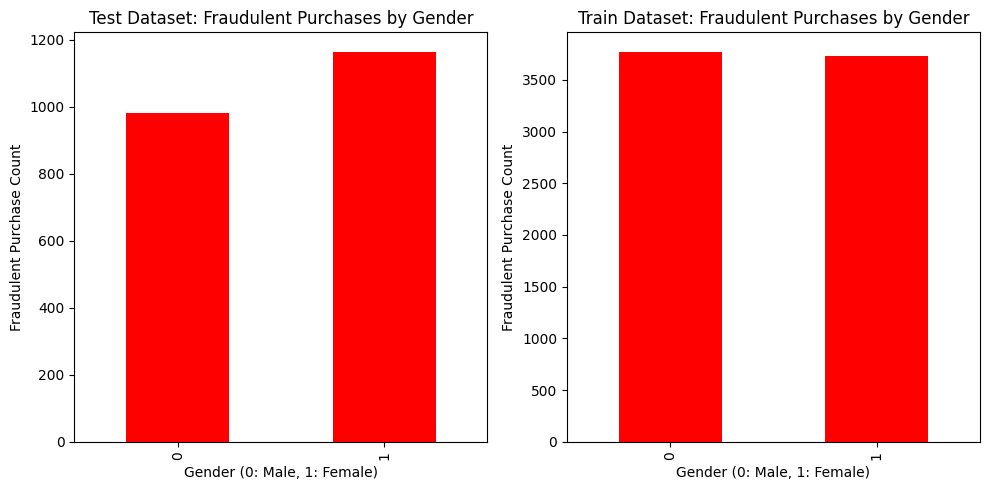

In [4]:
# Filter the data to only show fraudulent transactions and group by gender
test_fraud = test_df[test_df['is_fraud'] == 1].groupby('gender').size()
train_fraud = train_df[train_df['is_fraud'] == 1].groupby('gender').size()

# Creating subplots for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar chart for test dataset showing only fraudulent purchases
test_fraud.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Test Dataset: Fraudulent Purchases by Gender')
axes[0].set_xlabel('Gender (0: Male, 1: Female)')
axes[0].set_ylabel('Fraudulent Purchase Count')

# Bar chart for train dataset showing only fraudulent purchases
train_fraud.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Train Dataset: Fraudulent Purchases by Gender')
axes[1].set_xlabel('Gender (0: Male, 1: Female)')
axes[1].set_ylabel('Fraudulent Purchase Count')

plt.tight_layout()
plt.show()

## Analysis:

The two bar charts above show the amount of men and women who have committed credit card fraud across both datasets. Interestingly, in the test dataset the amount of women who have committed fraud is greater then the amount of men who have. However, in the train dataset the numbers are relitevely equal. Also, the difference between the amount of women and men who have committed fraud in the test dataset is only 183 (183 more women have committed fraud than men). With all this in mind it can be seen that the crime of credit card fraud is committed by both genders with relatively the same frequency.

In [5]:
# Find a correlation matrix for all numerical data provided, to find which has the highest correlation with is_fraud
train_only_num_df = train_df.select_dtypes(include='number')

train_only_num_df.corr()

,merch_lat,merch_long,unix_time,amt,gender,lat,long,is_fraud
merch_lat,1.000000,-0.015431,0.000561,-0.001873,-0.042645,0.993592,-0.015452,0.001741
merch_long,-0.015431,1.000000,-0.000635,-0.000151,-0.050350,-0.015509,0.999120,0.001721
unix_time,0.000561,-0.000635,1.000000,-0.000293,0.000960,0.000632,-0.000642,-0.005078
amt,-0.001873,-0.000151,-0.000293,1.000000,-0.001034,-0.001926,-0.000187,0.219404
gender,-0.042645,-0.050350,0.000960,-0.001034,1.000000,-0.042935,-0.050404,-0.007642
lat,0.993592,-0.015509,0.000632,-0.001926,-0.042935,1.000000,-0.015533,0.001894
long,-0.015452,0.999120,-0.000642,-0.000187,-0.050404,-0.015533,1.000000,0.001721
is_fraud,0.001741,0.001721,-0.005078,0.219404,-0.007642,0.001894,0.001721,1.000000


In [6]:
import numpy as np
import matplotlib.pyplot as plt

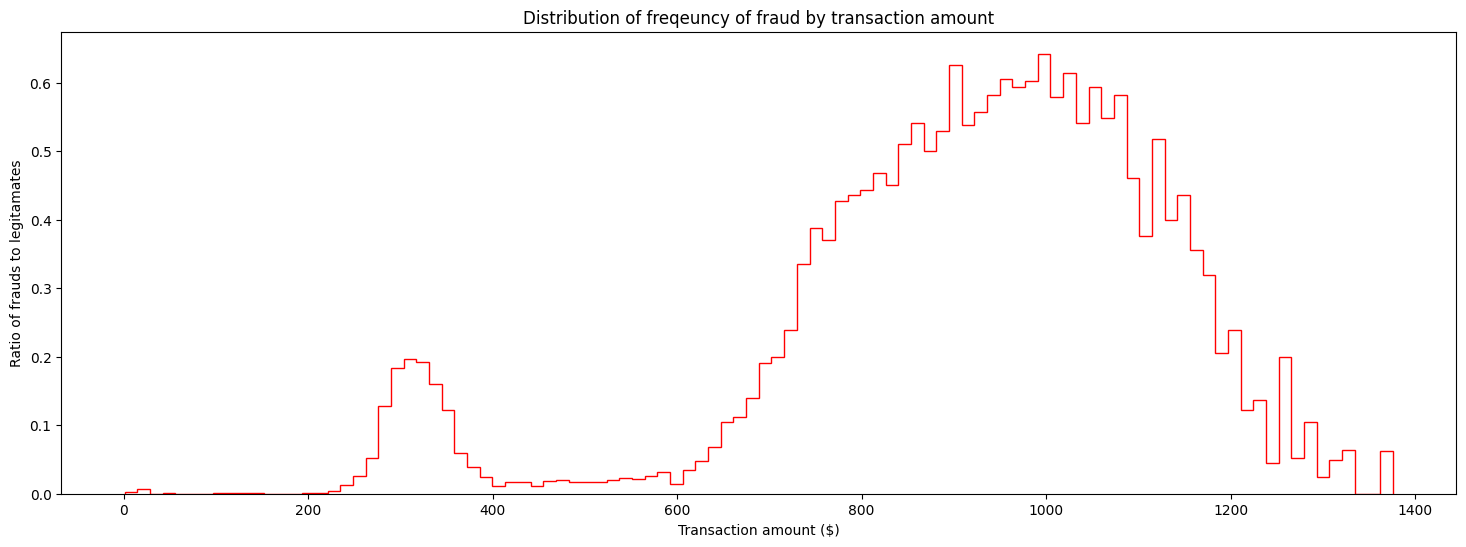

In [7]:
num_bins = 100

# The relevent range of transaction amounts: the range from the smallest fraud transaction to the largest.
bin_range = (train_df[train_df['is_fraud'] == 1]['amt'].min(), train_df[train_df['is_fraud'] == 1]['amt'].max())

# information about each of the bins of the histogram of transaction amounts.
# Namely, how many transactions are in a given bin (range of transaction values)
bins = np.histogram(train_df['amt'], bins = num_bins, range = bin_range)

# The values of each bar (bin) of the hitogram
bin_sizes = bins[0]

# The x coordinates of the start of each bin (and the end corrdinates of the last bin)
bin_coords = bins[1]

# The number of fradulent transaction in each bin
num_fraud_by_bin = np.histogram(train_df[train_df['is_fraud'] == 1]['amt'], bins = num_bins, range = bin_range)[0]

# cunstructing a list of the ratios between the number of fradulent transactions and the number of transactions for a given bin
ratio_fraud_transaction_by_bin = list()

for i in range(0, num_bins):
    if(bin_sizes[i] == 0):
        ratio_fraud_transaction_by_bin.append(0)
        continue
    ratio_fraud_transaction_by_bin.append(num_fraud_by_bin[i]/bin_sizes[i])

# Histrogram for Distribution of freqeuncy of fraudulent transactions across transaction amount ranges
plt.stairs(values = ratio_fraud_transaction_by_bin, edges = bin_coords, color ='r')
plt.xlabel('Transaction amount ($)')
plt.ylabel('Ratio of frauds to legitamates')
plt.title('Distribution of freqeuncy of fraud by transaction amount')
plt.gcf().set_size_inches(18, 6)
plt.show()

## Analysis:

This histogram shows how frequent fradulent transactions are in regular ranges of transactions. Each individual bar's hight is the ratio of the number of fradulent transactions within the bar's range to the number of trasactions in the bar's range. So, for example, a bar on the range (300, 320) with a hieght of .8 would imply that, for all transactions with a transaction amount between 300 and 320, 80% of those transactions are fradulent.

Note that the histogram has been limited to the relevant range. That is, the range where fradulent transactions appear. The range of actual transactions is much larger.

From this histogram, a clear pattern emerges: Fradulent transactions make up a disproportionate amount of the transactions with amounts between 600 and 1300. In fact, transactions with an amount around $1000 generally have a greater chance to be fradulent than legitamate.

## Unused work:
The following code cells were developed while trying to create the final product above. While they do not revel much useful information for visualization now, they may be useful latter.

The merchant_fraud_ratio_series in particular may be useful for determining if a transaction is expected to be fradulent based on the merchant it originated from / was paied to.

In [8]:
merchants = train_df['merchant'].unique()

# Find the number of fradulent transactions each merchant has
num_frauds_by_merchant = dict((merchant, 0) for merchant in merchants)
for merchant in train_df[train_df['is_fraud'] == 1]['merchant']:
    num_frauds_by_merchant[f'{merchant}'] += 1

# Find the number of transactions each merchant has
num_transactions_by_merchant = dict((merchant, 0) for merchant in merchants)
for merchant in train_df['merchant']:
    num_transactions_by_merchant[f'{merchant}'] += 1



# Find the ratio of frauds to transactions each merchent has
merchant_fraud_ratio = dict((merchant, 0) for merchant in merchants)
for merchant in merchants:
    merchant_fraud_ratio[f'{merchant}'] = num_frauds_by_merchant[f'{merchant}'] / num_transactions_by_merchant[f'{merchant}']

# Create a seres from the data, sorted into decedning order
merchant_fraud_ratio_series = pd.Series(merchant_fraud_ratio).sort_values(ascending = False)

# Remove all non-fradulent merchants
merchant_fraud_ratio_series = merchant_fraud_ratio_series[merchant_fraud_ratio_series != 0]

merchant_fraud_ratio_series

Kozey-Boehm                      0.025723
Herman, Treutel and Dickens      0.025385
Kerluke-Abshire                  0.022307
Brown PLC                        0.022109
Goyette Inc                      0.021616
                                   ...   
Berge-Hills                      0.000438
Schmidt-Larkin                   0.000420
Prosacco, Kreiger and Kovacek    0.000410
Beier and Sons                   0.000404
Eichmann-Kilback                 0.000392
Length: 679, dtype: float64

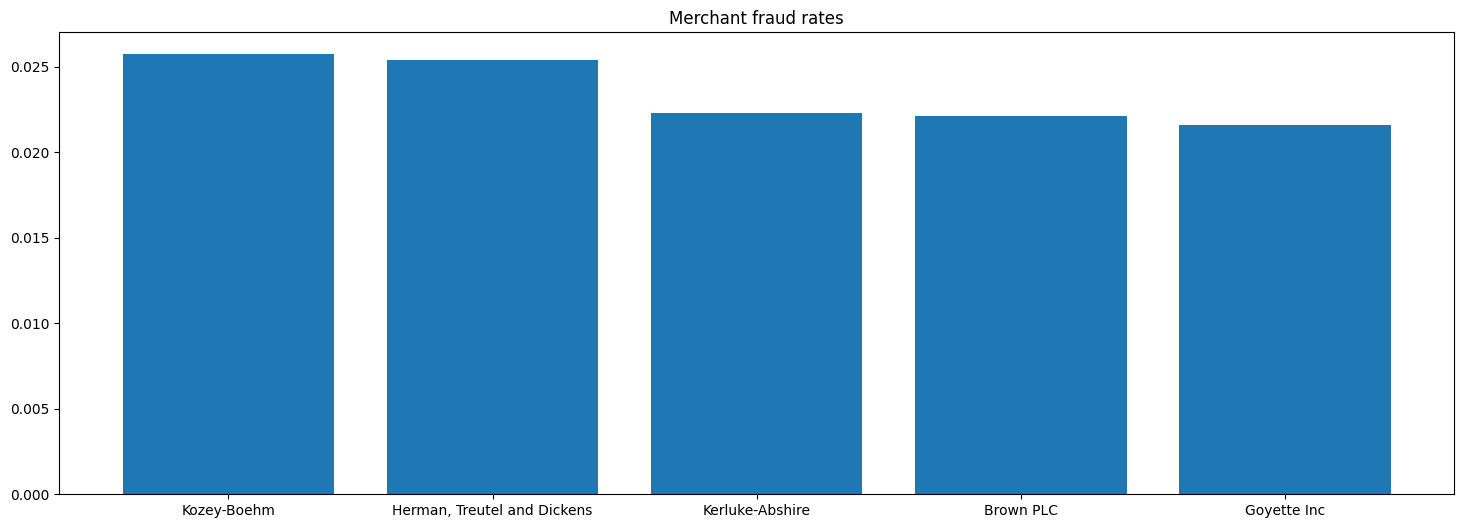

In [9]:
# Histogram to compare rate of fraudulent transactions between the 5 most fraudulent merchants

plt.bar(merchant_fraud_ratio_series.head().keys(), merchant_fraud_ratio_series.head())
plt.gcf().set_size_inches(18, 6)
plt.title('Merchant fraud rates')
plt.show()

This bar graph displays the fraud rates of the 5 most fradulent merchents. While this does not provide much in the way of interesting data, it may be useful to help a ML model train off of merchant name data.